In [1]:
import pandas as pd
data=pd.read_csv("data.csv")

In [2]:
len(data["tweet_text"])

162520

In [3]:
import string

In [4]:
trump=data[data["tweet_text"].str.contains('trump')]
trump1=data[data["tweet_text"].str.contains('Trump')]
donald=data[data["tweet_text"].str.contains("Donald")]
trump=trump.append(trump1)
trump=trump.append(donald)

In [5]:
trump.drop_duplicates(inplace=True)
len(trump["tweet_text"])

98247

In [6]:
hillary=data[data["tweet_text"].str.contains('hillary')]
hillary1=data[data["tweet_text"].str.contains("Hillary")]
clinton=data[data["tweet_text"].str.contains("Clinton")]
clinton1=data[data["tweet_text"].str.contains("clinton")]
hillary=hillary.append(hillary1)
hillary=hillary.append(clinton)
hillary=hillary.append(clinton1)

In [7]:
hillary.drop_duplicates(inplace=True)
len(hillary["tweet_text"])

54980

In [8]:
trump.to_csv("trump.csv",index=False)
hillary.to_csv("hillary.csv",index=False)

Trump

In [9]:
import networkx as nx
tmp_trump = trump.loc[trump['original_author'] != "Null"]

In [10]:
retweets_trump = nx.from_pandas_edgelist(tmp_trump, source='user_screen',
                                     target='original_author',
                                     edge_attr=True,
                                     create_using=nx.MultiDiGraph())

In [11]:
nx.write_edgelist(retweets_trump, 'retweets_trump.csv')

In [12]:
print("The graph has", len(retweets_trump.nodes), "nodes and", len(retweets_trump.edges), "edges")

The graph has 44788 nodes and 64468 edges


In [13]:
import matplotlib.pyplot as plt
from operator import itemgetter
node_and_degree = retweets_trump.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
print(largest_hub,degree)

realDonaldTrump 7144


In [14]:
import community

In [15]:
#first compute the best partition
retweets_trump_new=retweets_trump.to_undirected()
partition = community.best_partition(retweets_trump_new)

In [16]:
dendo = community.generate_dendrogram(retweets_trump_new)
for level in range(0,len(dendo) - 1):
    print("partition at level", level,
          "is", community.partition_at_level(dendo, level))

partition at level 0 is {'pedana2014': 0, 'datrumpnation1': 0, 'grannygethealth': 1, 'RCampopiano': 2, 'jdelreal': 3, 'Fahrenthold': 4, 'uhkatt': 5, 'sweetbeccc': 5, 'RZimms': 6, '29aprilJoy': 6, 'PlentyJohnson': 7, 'patrick_hostis': 7, 'hkpa85': 8, 'xxdr_zombiexx': 8, 'trueheart78': 9, 'makeitsnowondem': 9, 'thejenn999': 10, '_LeoIzmir': 10, 'Wiseronenow': 11, 'TriciaNC1': 11, 'pornstarsearch_': 12, 'kellytrump_': 12, 'GodandtheBear': 13, 'ToConservatives': 13, 'sankarchanda99': 0, 'bannerite': 14, 'ideate_vision': 15, 'gumdropheaven': 16, 'jonnaekman': 17, 'RaymondSultan': 17, 'Stonerellllla': 18, 'Danimal_5': 18, 'Esteban15120999': 19, 'trumpaboard': 20, 'RightAsRain7': 21, 'Ellysa_Maye': 22, 'averycoolwoman': 23, 'skyavroses': 23, 'at_maggiemac': 24, 'nepafortrump': 25, 'politihawk': 26, 'DebdebWilder': 27, 'BakerHugh': 27, 'LewisRobbie12': 28, 'BaySean': 28, 'hahume': 29, 'patriots4trump': 29, 'KungFunny': 15, 'ArterialBoomSv': 30, 'soycrash': 30, 'Melbmilfcouple': 31, 'TT3Racing'

In [17]:
community.modularity(partition, retweets_trump_new)

0.6529481711926769

In [20]:
# Keep only communities with a minimum of authors
counter=0
centers = {}
communities = {}
G_main_com = retweets_trump_new.copy()
min_nb = 1000
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    if len(list_nodes) < min_nb:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        # Print community
        print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' retweeters:')
        counter=counter+1
        print(list_nodes, '\n')

Community of  mitchellvii (ID  0 ) -  4851  retweeters:
['pedana2014', 'datrumpnation1', 'grannygethealth', 'RCampopiano', 'RZimms', '29aprilJoy', 'PlentyJohnson', 'patrick_hostis', 'sankarchanda99', 'Esteban15120999', 'frgrab_frank', 'MissAdessa', 'movement_trump', 'bfrasier1951', 'dixiefortrump', 'melvinteach', 'sheipet912', 'Trump_World', 'graycsam', 'America_First_1', 'snowlady09', 'BlissTabitha', 'Lagartija_Nix', 'trumpactivist', 'MissMiami', 'knowsey', 'Leatherslinger', 'jmdonsi', 'PopoBauman', 'MassenaFlyBoy', 'Paolalopez1971', 'fixerofthings', 'adjunctprofessr', 'sigstarget', 'CaribouKitty', 'fyrecapt12a', 'marinevet1982', 'grumpyandtired7', 'lainieks', 'Jimrharv', 'ebaytoad', 'TAPABC', 'br24069463', 'Brainykid2010', 'washington_bear', 'LaurieAnnBaker', 'diane4truth', '1jasminejudith1', 'elisamich0422', 'BoehlyE', 'emperorphil', 'organic2016', 'CarmineZozzora', 'UghToHillary', 'ThatTrumpGuy', 'Rudedog6557', 'Kayem623', 'AmerPride777', 'srfulton22', 'markagallolv', 'ispytexas', 

Community of  SopanDeb (ID  11 ) -  4395  retweeters:
['ideate_vision', 'DebdebWilder', 'BakerHugh', 'KungFunny', 'Fran_Neena20409', 'Mysteri759', 'bettyribs', 'iamforeverblue2', 'ourrepublic76', 'wcsek', 'daveedchill', 'eyesawthat', 'BootayfulChaos', 'BillShedd', 'Sunnysgrl62', 'dc346c9fdcbb432', 'JacloPac', 'peterdaou', 'geokaren', 'thumppooh', 'khamsin64', 'mamastarlight', 'iiLouisO', 'hotsosreis', 'Jasonatdabeach', 'bndsnoopy61', 'ramos1944', 'rolandoideas12', 'Larramarr1980', 'cjtrunchar', 'jamespmanley', 'AnamikaMadad', 'dmwal1958', 'osborn1124', 'ma_nyc7', 'ForQ2', 'AnnieBowl', 'PizzaToThePolls', 'dalseyd', 'Keep2020Alive', 'PKFLRDA', 'wh4tdafuq', 'GabrielDanRadu', 'piperjori', 'henrygalvin88', 'bunnyhugger75', 'crazyfamilyomg', 'jlg718', 'ChrisCuomo', 'winterthur', 'MccordShane', 'PerryDTraylor', 'DMW_JD2014', 'linda_dufresne', 'Catlady628', 'Left_Blog', 'barbaraward235', 'omimargo', 'tsnowbird5000', 'Gallaecian', 'skyinthegrass', 'fight4women', 'Bulmanghani', 'mdmjkl', 'Jessic

Community of  realDonaldTrump (ID  16 ) -  5134  retweeters:
['RightAsRain7', 'Ellysa_Maye', 'dollins62', 'realDrOlmo', 'thejolson', 'Mferris67', 'faagifts', 'DMathewsBHC', 'RSorrellBHC', 'cozyswimmer', 'americadiaspora', 'Verona83', 'nationdivided', '3172jam', 'prolife4grace', 'twilightblueam', 'G8torDad66', 'mialma00909', 'R5Eileen', 'DawnDCS92', 'TheTH1120', 'Jimvonyork', '4d4all', 'AngelaMoore44', 'Ga_Bunnie', 'LynnKuennen', 'ljlehere', 'Lambjrstephen', 'pacsgirl36', 'captainstaum775', 'KenTrumpTeam', 'AmericanYvonne', 'alicia45KAG', 'StateofDaniel', 'realDonaldTrump', 'BamaLady10', '208actor', 'HeimoRS', 'natalie21660', 'trumpwisconsin', 'clint4usa', 'trumplican2016', 'overmanwarrior', 'amberlocke_4', 'louiselloyd3', 'anderson5_paul', 'TraceFan123', 'tnfortrump', 'MariaMcAdams', 'fjvillafana', '7cloud7rider7', 'liamkfisher', 'marilyn_helton', 'jerrybthebuild', 'DCANCindy', 'moekamerow', 'GlennLittle5', 'LaurenJim777', 'USAMAGA1', 'KatMichaels5', 'bobsmith2111', 'BundrenStanley', '

Community of  CNN (ID  35 ) -  1095  retweeters:
['Race4President', 'pameladubsky49', 'agratlga', 'honey89052', 'emera1952', 'Pie_SocialMedia', 'RightKirke', 'ReiswigR', 'Milecal_Models', '55andwhat', 'BobbyTBD', 'ChobasB', 'caioblinder', 'SabrinaChoice', 'DalilaOliveiraR', 'KgKathryn', 'AddisonSunshine', 'hanae_56_20', 'kdDesertRed', 'danpfeiffer', 'PhillyCook', 'Laurie_David', 'mnboss1', 'cmackisthe1', 'KGauntner699', 'cnni', 'Reuters', 'newpath60', 'ClaraJeffery', 'Tejanamv', 'USATODAY', 'CNN', 'TIME', 'bakersfieldnow', 'CBSNews', 'mavislou59', 'PercivalSincere', 'gretch661', 'KarenLZimmerman', 'philipaklein', 'xuantran38', 'CNNPolitics', 'GideonResnick', 'JEscobar401', 'rubenrochaagbtg', 'flatrockflower', 'MT6200elev', 'ImChaunce', '_MamadouSECK_', 'lee_f81y', 'Rozarita', 'hrctrumpstrump', 'jnkanthony_jim', 'jophoskie', 'wmeng8', 'DevonDude_', 'markymark2009', 'Kasparov63', 'gramil15', 'attilatheblond', 'b2284', 'PalmerReport', 'ArabNewsRt11', 'EdgarMP96', 'WSJ', 'nickkemp12', 'man

In [21]:
print(counter)

6


In [23]:
import seaborn as sns

C:\Users\Kiki\Anaconda3\envs\Virtuelni\lib\site-packages\networkx\drawing\layout.py:595: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same R

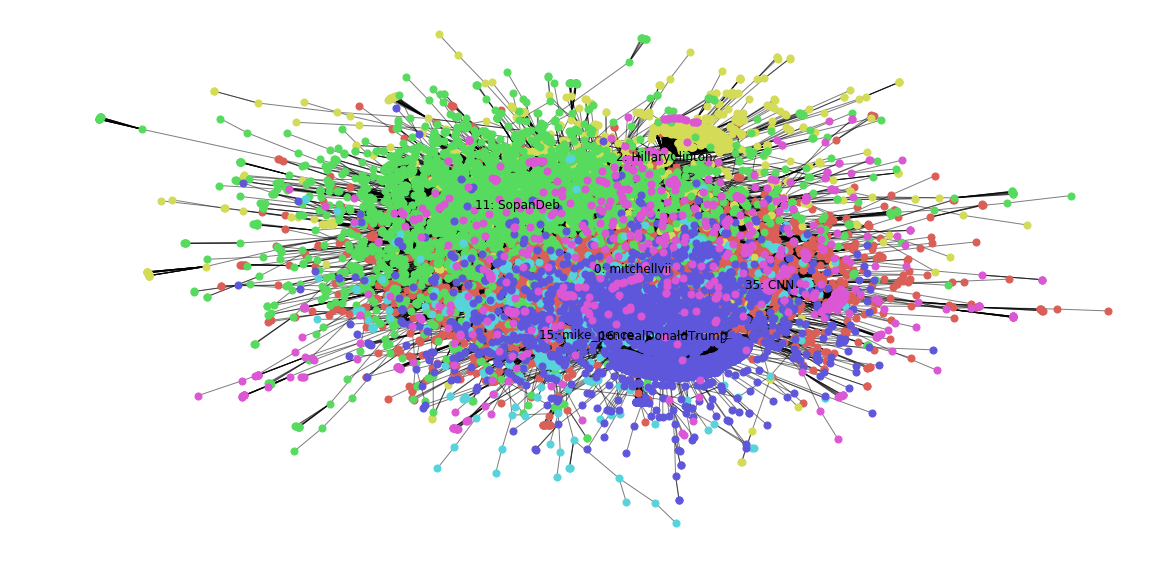

In [24]:
# Display graph
plt.figure(figsize=(20, 10))
node_size = 50
count = 0
pos = nx.spring_layout(G_main_com)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

for com in communities.keys():
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
    nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size = node_size, node_color = colors[com])
    nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size = node_size*5, node_color = colors[com])
nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)
labels = {k: str(v) + ': ' + k for k,v in centers.items()}
nx.draw_networkx_labels(G_main_com, pos, labels)
plt.axis('off')
plt.show()

In [44]:
nodes_main_com = {k: v for k, v in partition.items() if v in communities}
ind = community.induced_graph(nodes_main_com, G_main_com)
print('Number of communities', len(ind.nodes()))
print('\nMain communities and their center node:', communities)

Number of communities 6

Main communities and their center node: {0: 'mitchellvii', 2: 'HillaryClinton', 11: 'SopanDeb', 15: 'mike_pence', 16: 'realDonaldTrump', 35: 'CNN'}


C:\Users\Kiki\Anaconda3\envs\Virtuelni\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


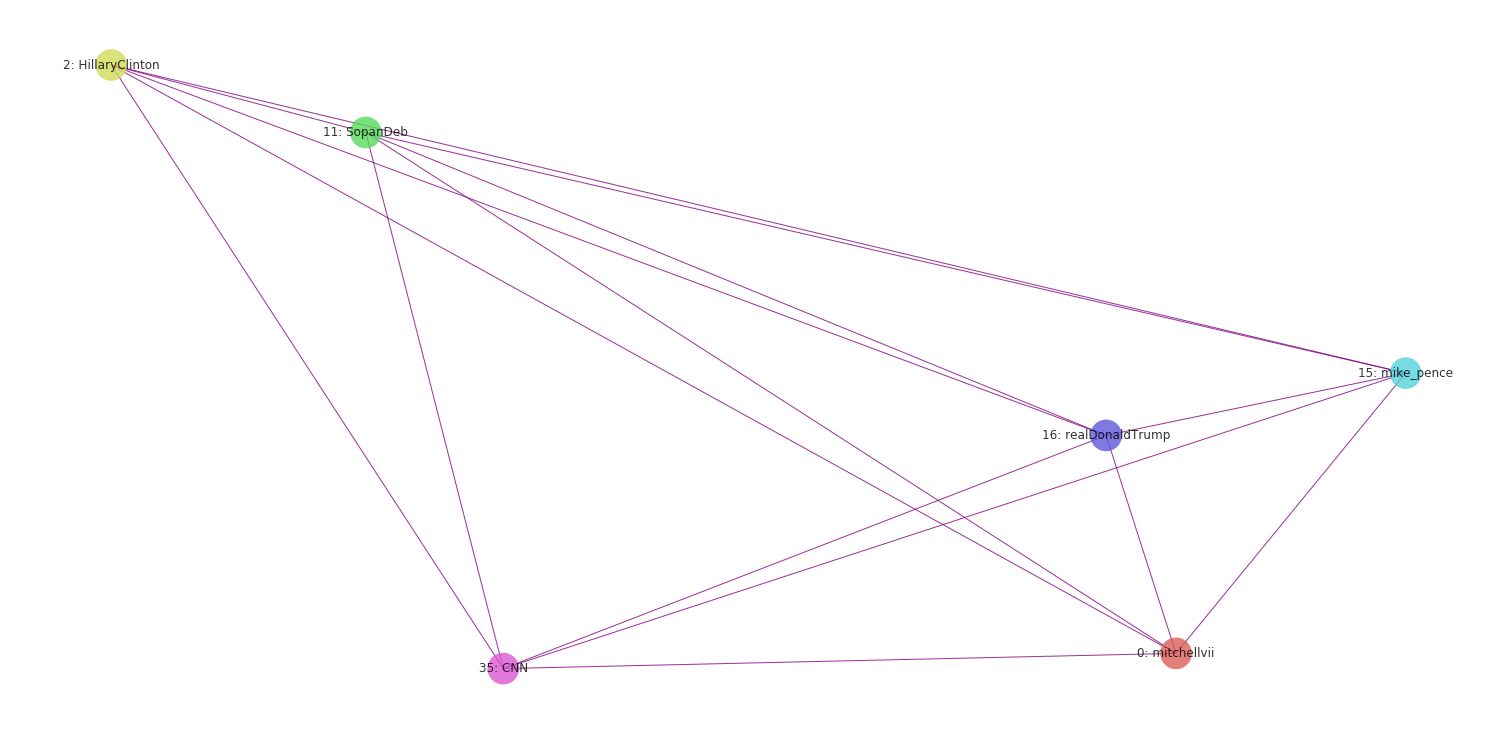

In [47]:
# Display induced graph
import seaborn as sns
plt.figure(figsize=(20, 10))
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

pos_ind = nx.spring_layout(ind)
labels = {k: str(k) + ': ' + v for k,v in communities.items()}
nx.draw(ind, pos_ind, node_list=list(colors.keys()), node_size=1000,node_color=list(colors.values()),alpha=0.8,labels=labels,linewidths=0.05,edge_color='purple')
#nx.draw_networkx_nodes(ind, pos_ind, node_list=list(colors.keys()), node_color=list(colors.values()),node_size = 50,labels=labels)
#nx.draw_networkx_edges(ind, pos_ind, alpha=0.05)
plt.axis("off")
plt.show()

Hillary Clinton

In [25]:
tmp_clinton = hillary.loc[hillary['original_author'] != "Null"]

In [26]:
retweets_clinton= nx.from_pandas_edgelist(tmp_clinton, source='user_screen',
                                     target='original_author',
                                     edge_attr=True,
                                     create_using=nx.MultiDiGraph())

In [27]:
nx.write_edgelist(retweets_clinton, 'retweets_clinton.csv')

In [28]:
print("The graph has", len(retweets_clinton.nodes), "nodes and", len(retweets_clinton.edges), "edges")

The graph has 28235 nodes and 37891 edges


In [29]:
import matplotlib.pyplot as plt
from operator import itemgetter
node_and_degree = retweets_clinton.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
print(largest_hub,degree)

HillaryClinton 2810


In [30]:
#first compute the best partition
retweets_clinton_new=retweets_clinton.to_undirected()
partition = community.best_partition(retweets_clinton_new)

In [31]:
dendo = community.generate_dendrogram(retweets_clinton_new)
for level in range(0,len(dendo) - 1):
    print("partition at level", level,
          "is", community.partition_at_level(dendo, level))

partition at level 0 is {'carolinelv': 0, 'PatrickJLavin': 0, 'PlentyJohnson': 1, 'patrick_hostis': 2, 'ItsADakJie': 3, 'IshamRais': 3, 'paulkobj8': 4, 'starknightz': 4, 'allenbarr1': 5, 'PaulManafort': 6, 'ShowMeStately': 6, 'JesseicaT': 7, 'Ms1Scs': 7, 'organic2016': 8, 'srfulton22': 9, 'ANOMALY1': 10, 'jrbushnyr': 11, 'howielemon13': 11, 'MikeMartin1733': 12, 'thinkamericana': 12, 'GraigMeyer': 13, 'loveismaroon': 13, 'Vhalen67': 14, 'smartvalueblog': 15, 'epicbooklover': 16, 'andimJULIE': 16, 'MUGGER1955': 17, 'wjappe': 17, 'Collette_AZ': 18, 'Kronishsports': 18, 'franciesays': 19, 'SscottSsmith84': 20, 'ChuckUmeboshi': 21, 'Bellanme2': 12, 'TikiMaximus': 22, 'jim261bob': 23, 'Dbargen': 23, 'JeanMaryAccart': 24, 'robocopin': 24, 'dixiefortrump': 25, '_innerzen': 26, 'b_murphs0531': 27, 'Ianjsiegfried': 27, 'spoopyjoshler': 28, 'antoniodelotero': 28, 'eckeisler61': 29, 'HelloTeamTrump': 29, 'iBrittanyLong': 30, 'immortalariana': 30, 'ver_wey': 6, 'pat48up': 23, 'skyjones55': 26, 're

In [32]:
community.modularity(partition, retweets_clinton_new)

0.6989788936985568

In [33]:
# Keep only communities with a minimum of authors
counter=0
centers = {}
communities = {}
G_main_com = retweets_clinton_new.copy()
min_nb = 1000
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    if len(list_nodes) < min_nb:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        # Print community
        print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' retweeters:')
        counter=counter+1
        print(list_nodes, '\n')

Community of  LindaSuhler (ID  9 ) -  1110  retweeters:
['MikeMartin1733', 'thinkamericana', 'Bellanme2', 'wildwest1900', 'dedriannes', 'danielc2010', 'Lauren011965', 'lalalod', 'Pradipdombale1', 'Stopcnnlies', 'adalineintexas', 'Rockprincess818', 'SurrattPenny', 'samsonrobertj', 'Paolalopez1971', '_Makada_', 'vivelafra', 'brockheather03', 'LindaSuhler', 'mariclaire81', 'Emmymacintx', 'andersonDrLJA', 'JaneBaldino', 'seanspicer', 'TIMENOUT', 'RealJack', 'Royalgeorgehk', 'MacBetty', 'diana102252', 'ARM1976', 'dclassicman01', 'JohnKStahlUSA', 'Tbaldwin510B', 'clarissamehler', 'ThatTrumpGuy', 'CarrieBck', 'Mayflowerbabe', '74f5c728e7d446d', 'twilightblueam', 'nellchar', 'eeniahoasis', 'normanderson22', 'thislifetoday', 'madamBeth2', 'musicman08', 'AntonioSabatoJr', 'WhatsUpBIGBAER', 'LBoogy31', 'RobertRickly', 'GenFlynn', 'voiletsareblue', 'dcnite56', 'MsHoefler', '4AmericaToday', 'vitamink1776', 'MT6200elev', 'kwilk50', 'trupatriot20', 'Esq4Trump2016', 'jennifervranes1', 'carlajopettty',

Community of  realDonaldTrump (ID  23 ) -  1679  retweeters:
['briankellykelly', 'Mitty281', 'ResidentOfFL', 'momofbaybry', 'conchbar17', 'doctrane', 'MeadowgirlM', 'weh8hillary', 'freebird_Pepper', 'Rhonda9080', '21stCenturysWJL', 'USAMAGA1', 'frespirit01', 'nomoreamnesty', 'KevinBooker212', 'nellytopuria', 'paulitee66', 'JerideGillain', 'ROYALMRBADNEWS', 'lionsfan7778', 'AcroAman', 'JoshuaAssaraf', 'DebbieAAldrich', 'sc007kc', 'TheDailyBail', 'LaurenVance19', 'realDonaldTrump', 'Queen__lyss', 'clubnewyork4', 'NRA', 'velvethammer', 'stayinthefightt', 'flee8250aolcom', 'VWAudiPorsche', 'Marijoe21178188', 'Marie903', 'maxger31', 'naterushnell', 'PBugbuster', 'Marianneshope', 'cikibucka', 'LouDobbs', 'amschlem98', '1SilvaMaria', 'USAAmericaFirst', 'CAPTDSPAWN5', 'SummerDurbin', 'Jwils809', 'adamstc08', 'rejenriquez', 'texaskat4trump', 'sbays44', 'Emperipolisis', 'ReconmomC', 'Wagsfam2', 'john_d0e22', 'DirtyMouseBalls', 'Mikey_w21', 'EllisonTeri', 'Claudia4Trump', 'trumpemall', 'mishra_ab

Community of  HillaryClinton (ID  89 ) -  2328  retweeters:
['Cognac4Paws', 'RandyResist', 'mccraneyhl', 'HillaryClinton', 'PGOrgeWalker', 'TeaPainUSA', 'FoL2009', 'samnyc5', 'Carmenr1Carmen', 'Still4Hill', 'ScentsyIda', 'GregoryLewis22', 'tweetsdistilled', 'SFL4Hillary', 'reyrosas', 'Petepwgc', 'solocurve', 'blucaller', 'jasonnobleIA', 'gofofunk', 'E20Launderette', 'moscato_mikayla', 'DebdebWilder', 'RandalCaffarel', 'jamescoleman07', 'gothamtomato', 'terrib1233', 'VinayanKottaka2', 'scguy309', 'queencerra', 'maikolmugno', 'darwinwoodka', 'Nickjames138', 'kathyplate', 'kelsey_kremer', '54xzy_Bc', 'audaciousninja', 'robinsbro', 'kathyritondo', 'sean_couch', 'lavkush_jaiswal', 'joyceporterdunn', 'edgeyptian', 'TwinSiSTAR', 'Jackson_Co_Dems', 'jbuhaug', 'Willeamon', 'Ginmato', 'briankornell', 'VILLAABIR', 'hopedellon', 'randyn7500', 'lizzvogel', 'igorvolsky', 'mrsg1176', 'kwqciv', 'honeychambs', 'deejay90192', 'BlancaIslasM', 'Hillary_esp', 'MickeyGjerris', 'NinaAustin52', 'tpowers6pack'

In [34]:
print(counter)

5


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

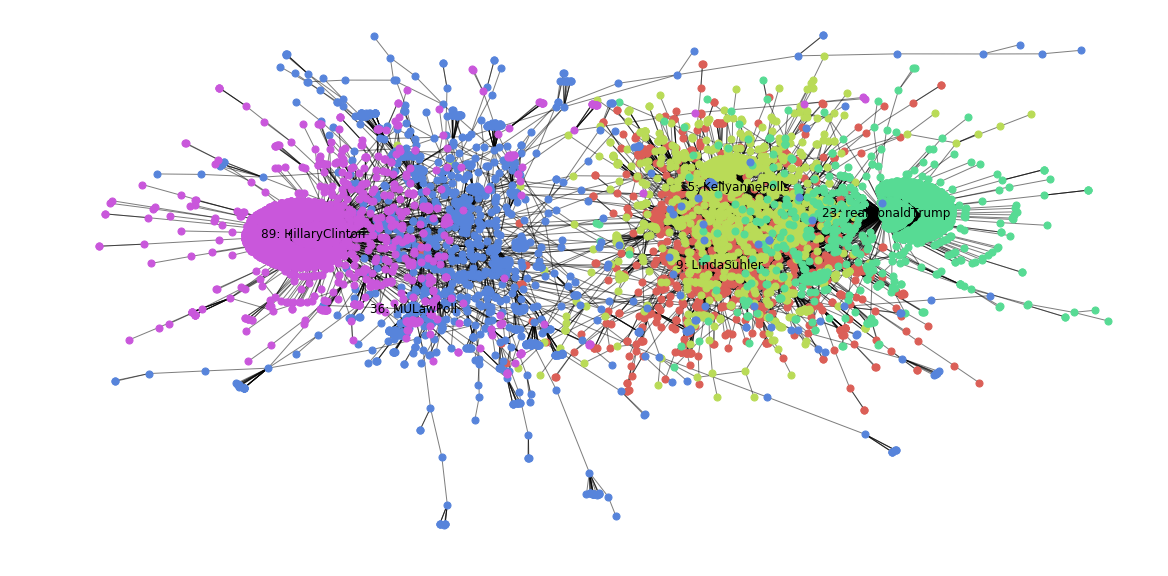

In [35]:
# Display graph
plt.figure(figsize=(20, 10))
node_size = 50
count = 0
pos = nx.spring_layout(G_main_com)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

for com in communities.keys():
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
    nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size = node_size, node_color = colors[com])
    nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size = node_size*5, node_color = colors[com])
nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)
labels = {k: str(v) + ': ' + k for k,v in centers.items()}
nx.draw_networkx_labels(G_main_com, pos, labels)
plt.axis('off')
plt.show()

In [58]:
nodes_main_com = {k: v for k, v in partition.items() if v in communities}
ind = community.induced_graph(nodes_main_com, G_main_com)
print('Number of communities', len(ind.nodes()))
print('\nMain communities and their center node:', communities)

Number of communities 5

Main communities and their center node: {9: 'LindaSuhler', 15: 'KellyannePolls', 23: 'realDonaldTrump', 36: 'MULawPoll', 89: 'HillaryClinton'}


C:\Users\Kiki\Anaconda3\envs\Virtuelni\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


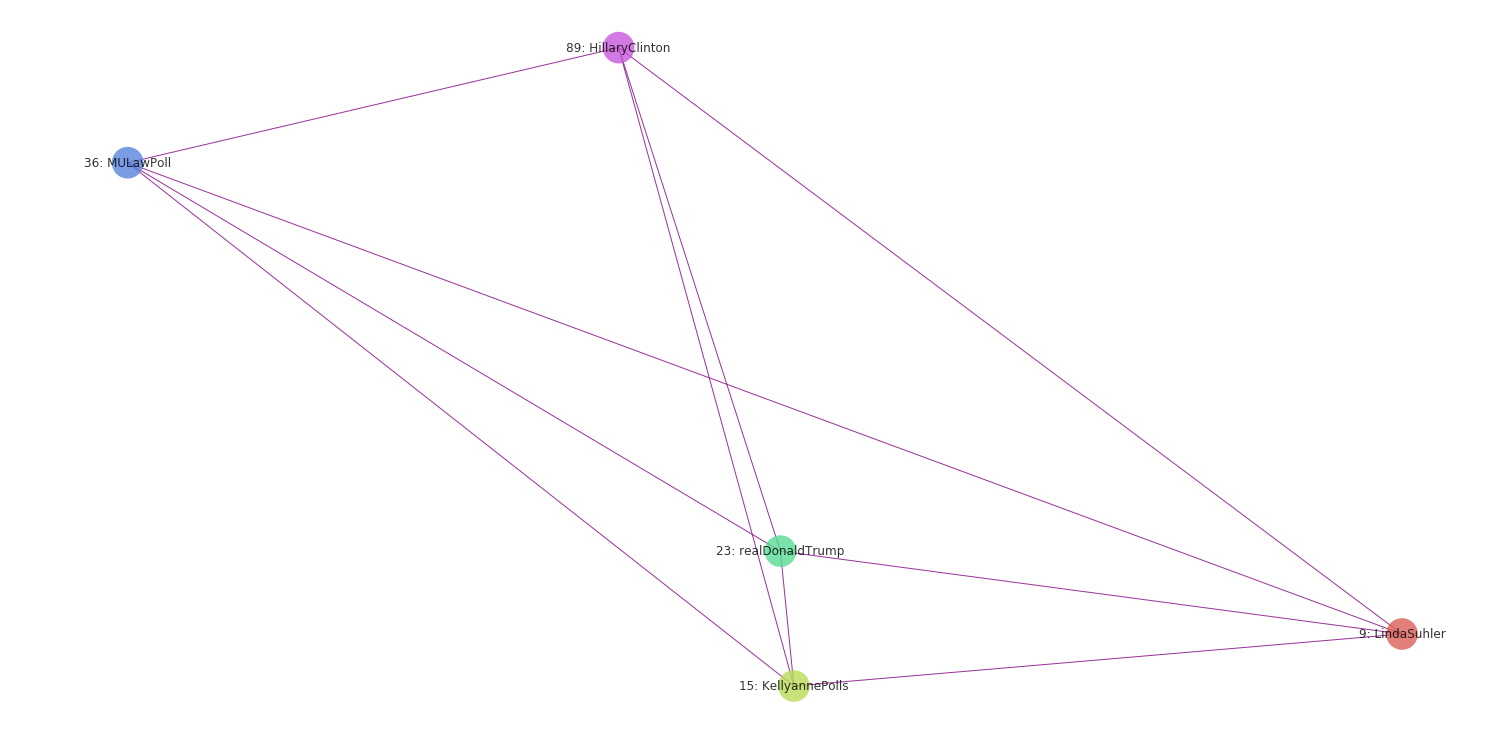

In [59]:
# Display induced graph
import seaborn as sns
plt.figure(figsize=(20, 10))
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

pos_ind = nx.spring_layout(ind)
labels = {k: str(k) + ': ' + v for k,v in communities.items()}
nx.draw(ind, pos_ind, node_list=list(colors.keys()), node_size=1000,node_color=list(colors.values()),alpha=0.8,labels=labels,linewidths=0.05,edge_color='purple')
#nx.draw_networkx_nodes(ind, pos_ind, node_list=list(colors.keys()), node_color=list(colors.values()),node_size = 50,labels=labels)
#nx.draw_networkx_edges(ind, pos_ind, alpha=0.05)
plt.axis("off")
plt.show()